# K-Means Clustering


## Problem Statement


Apply **K-Means** clustering on the **Iris dataset** using the **sepal length** and **petal width** features and divide the data into **three clusters**.


### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Circle
from sklearn.datasets import load_iris

### Load the Iris Dataset


In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
df = pd.DataFrame(X, columns=feature_names)
species_map = {i: name for i, name in enumerate(target_names)}
df["species"] = [species_map[label] for label in y]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Plotting


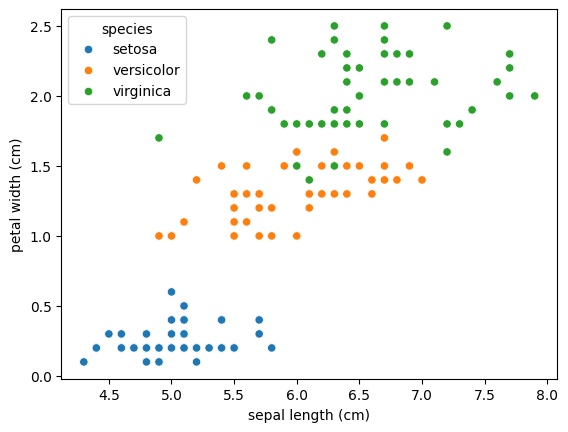

In [4]:
sns.scatterplot(x="sepal length (cm)", y="petal width (cm)", data=df, hue="species")
plt.show()

### Implement K-Means Clustering


In [5]:
X = iris.data[:, [0, 3]]
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

### Get cluster centers


In [6]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.81956522 1.97608696]
 [5.00377358 0.28867925]
 [5.83529412 1.44509804]]


### Visualize Clusters


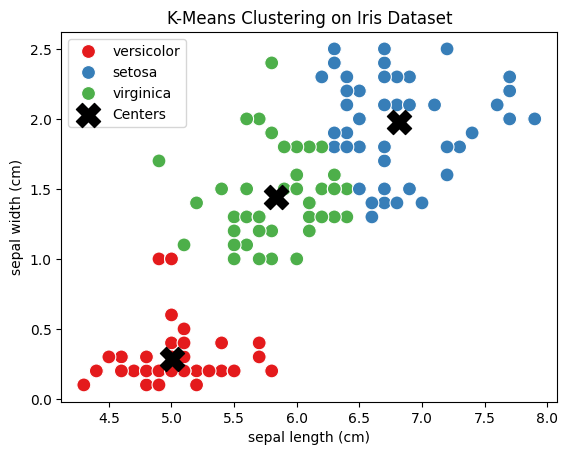

In [7]:
cluster_labels = ["setosa", "versicolor", "virginica"]
cluster_names = [cluster_labels[i] for i in labels]
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster_names, palette="Set1", s=100)
plt.scatter(
    centroids[:, 0], centroids[:, 1], s=300, c="black", marker="X", label="Centers"
)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

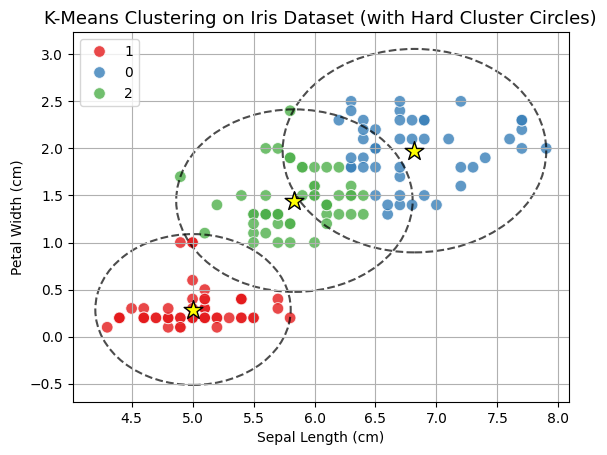

In [8]:
# Create DataFrame
df = pd.DataFrame(X, columns=["Sepal Length", "Petal Width"])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

df["Cluster"] = labels.astype(str)

# Compute radii for hard cluster circles
radii = []
for i in range(3):
    cluster_points = X[labels == i]
    centroid = centroids[i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    radius = np.max(distances)
    radii.append(radius)

sns.scatterplot(
    data=df,
    x="Sepal Length",
    y="Petal Width",
    hue="Cluster",
    palette="Set1",
    s=70,
    alpha=0.8,
)

# Plot centroids and circles
ax = plt.gca()
for i in range(3):
    # Centroid
    plt.scatter(
        centroids[i, 0],
        centroids[i, 1],
        s=200,
        c="yellow",
        edgecolor="black",
        marker="*",
        zorder=5,
    )
    # Hard cluster circle
    circle = Circle(
        (centroids[i, 0], centroids[i, 1]),
        radii[i],
        color="black",
        fill=False,
        linestyle="--",
        linewidth=1.5,
        alpha=0.7,
    )
    ax.add_patch(circle)

plt.title("K-Means Clustering on Iris Dataset (with Hard Cluster Circles)", fontsize=13)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()